### Basic Operations on Image

#### Accessing and Modifying pixel values

In [2]:
import numpy as np
import cv2 as cv

In [3]:
img = cv.imread("saber.jpg")
assert img is not None, "file could not be read, check with os.path.exists()"

px = img[100, 100]

# accessing only blue pixel
blue = img[100, 100, 0]

img[100,100] = [255,255,255]

In [4]:
img.itemset((10,10,2), 100)

In [5]:
img.shape

(203, 862, 3)

In [6]:
ball = img[140:200, 400:460]

In [7]:
img[70:130, 300:360] = ball

In [10]:
cv.imshow("image",img)
if cv.waitKey(0) == 27 :
    cv.destroyAllWindows()

#### Splitting and Merging Image Channels

In [11]:
b,g,r = cv.split(img)
img = cv.merge((b,g,r))

In [16]:
b = img[:,:,0]

#### Making Borders for images (Padding)

BORDER_CONSTANT
- Adds a constant colored border

BORDER_REFLECT
- Border will be mirror reflection of the border elements
- like fedcba|abcdefgh|hgfedcb

BORDER_REFLECT_101 or BORDER_DEFAULT
- Same as above, but with a slight change
- like gfedcb|abcdefgh|gfedcba

BORDER_REPLICATE
- Last element is replicated throughout
- like aaaaaa|abcdefgh|hhhhhh

BORDER_WRAP
- str\[-1:] | str | str\[0:]
- it will look like cdefgh|abcdefgh|abcdefg

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

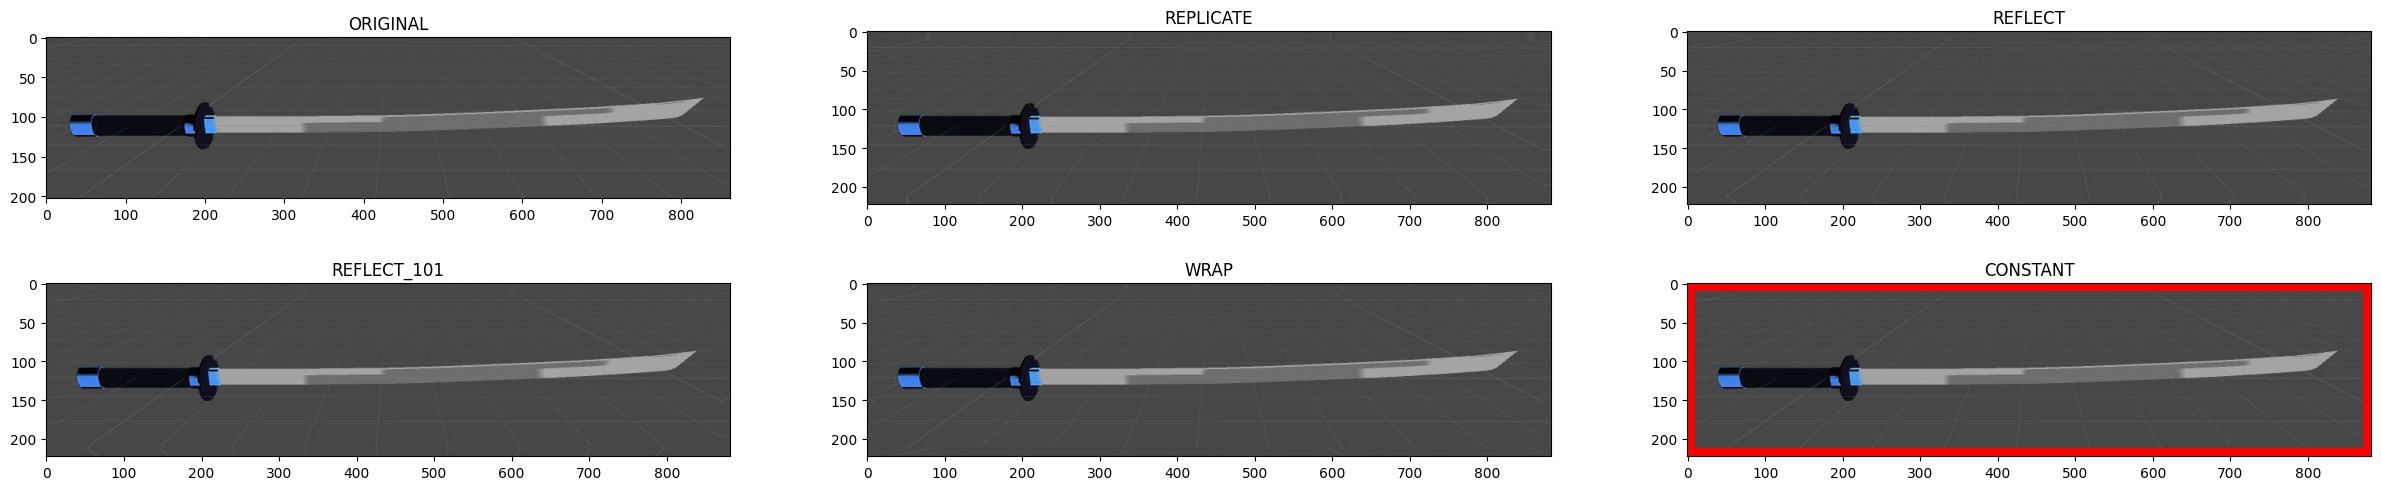

In [33]:
BLUE = [255,0,0]

img1 = cv.imread("saber.jpg")
assert img1 is not None, "file could not be read, check with os.path.exists()"

replicate = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_WRAP)
constant = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_CONSTANT,value=BLUE)

plt.figure(figsize=(30,6))

plt.subplot(231),plt.imshow(img1,'gray'),plt.title("ORIGINAL")
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title("REPLICATE")
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title("REFLECT")
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title("REFLECT_101")
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title("WRAP")
plt.subplot(236),plt.imshow(constant,'gray'),plt.title("CONSTANT")

plt.show()

### Arithmetic Operations on Images

You can add two images with the OpenCV function,

$$cv.add()$$
$$or$$
$$res = img1+img2$$

Both images should be of same depth and type

In [42]:
x = np.uint8([250])
y = np.uint8([10])

print(cv.add(x,y)) # 250+10 = 260 => 255
print("---------")
print(x+y) #250+10 = 260 % 256 = 4

[[260.]
 [  0.]
 [  0.]
 [  0.]]
---------
[4]


#### Image Blending

$$g(x) = (1-\alpha)f_{0}(x)) + \alpha f_1(x)$$

By varying $\alpha$ from 0 -> 1, you can perform cool transition between one image to another

$$ dst = \alpha \cdotp img1 + \beta \cdotp img2 + \gamma$$

Here $\gamma$ is taken as zero

In [68]:
# 한글 파일명 안읽어지므로 주의

In [85]:
img1 = cv.imread('saber.jpg')
img2 = cv.imread('loaImage.png')
print(img1.shape, img2.shape)

(203, 862, 3) (701, 448, 3)


In [97]:
img1 = cv.imread('saber.jpg')
img2 = cv.imread('loaImage.png')
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"

img1 = img1[50:150,100:400]
img2 = img2[300:400,100:400]

dst = cv.addWeighted(img1, 0.7, img2, 0.3, 0)

cv.imshow('dst',dst)
cv.waitKey(0)
cv.destroyAllWindows()

#### Bitwise Operations

This includes the bitwise AND, OR, NOT, and XOR operations.

They will be highly useful while extracting any part of the image, defining and working with non-rectangular ROI's, and etc.

In [198]:
# Load two images
img1 = cv.imread('saber.jpg')
img2 = cv.imread('loaImage.png')
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"

img1 = img1[50:150,100:400]
img2 = img2[300:400,100:400]

# I want to put logo on top-left corner, So I create a ROI
rows, cols, channels = img2.shape
roi = img1[0:rows, 0:cols]

# Now create a mask of logo and create its iverse mask also
img2gray = cv.cvtColor(img2, cv.COLOR_RGB2GRAY)
ret, mask = cv.threshold(img2gray, 50, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi, roi, mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2, img2, mask = mask)

# Put logo in ROI and modify the main image
dst = cv.add(img1_bg, img2_fg)
img1[0:rows, 0:cols] = dst

cv.imshow('res', img1)
cv.waitKey(0)
cv.destroyAllWindows()

In [201]:
# Load two images
img1 = cv.imread('saber.jpg')
img2 = cv.imread('loaImage.png')
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"

img1 = img1[50:150,100:400]
img2 = img2[300:400,100:400]

# I want to put logo on top-left corner, So I create a ROI
rows, cols, channels = img2.shape
roi = img2[0:rows, 0:cols]

# Now create a mask of logo and create its iverse mask also
img1gray = cv.cvtColor(img1, cv.COLOR_RGB2GRAY)
ret, mask = cv.threshold(img1gray, 50, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

# Now black-out the area of logo in ROI
img2_bg = cv.bitwise_and(roi, roi, mask = mask_inv)

# Take only region of logo from logo image.
img1_fg = cv.bitwise_and(img1, img1, mask = mask)

# Put logo in ROI and modify the main image
dst = cv.add(img2_bg, img1_fg)
img1[0:rows, 0:cols] = dst

cv.imshow('res', img1)
cv.waitKey(0)
cv.destroyAllWindows()

### Performance Measurement and Improvement Techniques

#### Measuring Performance with OpenCV

In [204]:
e1 = cv.getTickCount()
# your code execution
e2 = cv.getTickCount()
time = (e2 - e1) / cv.getTickFrequency()

0.239212


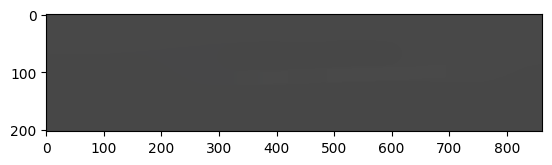

In [209]:
img1 = cv.imread("saber.jpg")
assert img1 is not None, "file could not be read, check with os.path.exists()"

e1 = cv.getTickCount()
for i in range(5,49,2):
    img1 = cv.medianBlur(img1,i)
e2 = cv.getTickCount()
t = (e2 - e1)/cv.getTickFrequency()
print(t)
plt.imshow(img1)

#### Default Optimization in OpenCV

In [210]:
# check if optimization is enabled
cv.useOptimized()

True

In [211]:
%timeit res = cv.medianBlur(img,49)

11.3 ms ± 54.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [212]:
cv.setUseOptimized(False)

In [213]:
cv.useOptimized()

False

In [214]:
%timeit res = cv.medianBlur(img, 49)

12.6 ms ± 1.93 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [215]:
cv.setUseOptimized(True)

#### Measuring Performance in IPython

In [216]:
x = 5

In [217]:
%timeit y=x**2

233 ns ± 0.0945 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [218]:
%timeit y=x*x

55.8 ns ± 0.413 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [219]:
z = np.uint8([5])

In [220]:
%timeit y=z*z

597 ns ± 1.54 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [221]:
%timeit y=np.square(z)

537 ns ± 0.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [222]:
%timeit y=z**2

604 ns ± 2.34 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [234]:
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [235]:
%timeit z = cv.countNonZero(img)

4.55 µs ± 2.43 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [236]:
%timeit z = np.count_nonzero(img)

8.1 µs ± 2.11 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
